In [1]:
from IPython.display import Image

## Tokenization

Tokenization is at the heart of much weirdness of LLMs. Do not brush it off.

- Why can't LLM spell words? Tokenization.
- Why can't LLM do super simple string processing tasks like reversing a string? Tokenization.
- Why is LLM worse at non-English languages (e.g. Japanese)? Tokenization.
- Why is LLM bad at simple arithmetic? Tokenization.
- Why did GPT-2 have more than necessary trouble coding in Python? Tokenization.
- Why did my LLM abruptly halt when it sees the string "<|endoftext|>"? Tokenization.
- What is this weird warning I get about a "trailing whitespace"? Tokenization.
- Why the LLM break if I ask it about "SolidGoldMagikarp"? Tokenization.
- Why should I prefer to use YAML over JSON with LLMs? Tokenization.
- Why is LLM not actually end-to-end language modeling? Tokenization.
- What is the real root of suffering? Tokenization.

Good tokenization web app: https://tiktokenizer.vercel.app

Example string:

Tokenization is at the heart of much weirdness of LLMs. Do not brush it off.

127 + 677 = 804
1275 + 6773 = 8041

Egg.
I have an Egg.
egg.
EGG.

만나서 반가워요. 저는 OpenAI에서 개발한 대규모 언어 모델인 ChatGPT입니다. 궁금한 것이 있으시면 무엇이든 물어보세요.

for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)



In [2]:
"안녕하세요 👋 (hello in Korean!)"

'안녕하세요 👋 (hello in Korean!)'

In [3]:
[ord(x) for x in "안녕하세요 👋 (hello in Korean!)"]

[50504,
 45397,
 54616,
 49464,
 50836,
 32,
 128075,
 32,
 40,
 104,
 101,
 108,
 108,
 111,
 32,
 105,
 110,
 32,
 75,
 111,
 114,
 101,
 97,
 110,
 33,
 41]

### why cant't we just use this natively as is?

1. Unicode is quite long.
2. Unicode keeps change.
3. UTF-8 is better.

In [4]:
list("안녕하세요 👋 (hello in Korean!)".encode('utf-8'))

[236,
 149,
 136,
 235,
 133,
 149,
 237,
 149,
 152,
 236,
 132,
 184,
 236,
 154,
 148,
 32,
 240,
 159,
 145,
 139,
 32,
 40,
 104,
 101,
 108,
 108,
 111,
 32,
 105,
 110,
 32,
 75,
 111,
 114,
 101,
 97,
 110,
 33,
 41]

but if we just use utf8 naively, these are bite-streams so that would imply a vocabulary length of only 256 possible tokens.

In [5]:
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = "Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception."
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience
print('---')
print(text)
print("length:", len(text))
print('---')
print(tokens)
print("length:", len(tokens))

---
Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.
length: 533
---
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140

In [6]:
def get_stats(ids):
    """
    연속된 토큰의 출현 횟수을 count하는 함수
    """
    counts = {}
    for pair in zip(ids, ids[1:]): # Pythonic way to iterate consecutive elements
        counts[pair] = counts.get(pair, 0) + 1
    return counts

stats = get_stats(tokens)
# print(stats)
print(sorted(((v,k) for k,v in stats.items()),reverse=True))

[(20, (101, 32)), (15, (240, 159)), (12, (226, 128)), (12, (105, 110)), (10, (115, 32)), (10, (97, 110)), (10, (32, 97)), (9, (32, 116)), (8, (116, 104)), (7, (159, 135)), (7, (159, 133)), (7, (97, 114)), (6, (239, 189)), (6, (140, 240)), (6, (128, 140)), (6, (116, 32)), (6, (114, 32)), (6, (111, 114)), (6, (110, 103)), (6, (110, 100)), (6, (109, 101)), (6, (104, 101)), (6, (101, 114)), (6, (32, 105)), (5, (117, 115)), (5, (115, 116)), (5, (110, 32)), (5, (100, 101)), (5, (44, 32)), (5, (32, 115)), (4, (116, 105)), (4, (116, 101)), (4, (115, 44)), (4, (114, 105)), (4, (111, 117)), (4, (111, 100)), (4, (110, 116)), (4, (110, 105)), (4, (105, 99)), (4, (104, 97)), (4, (103, 32)), (4, (101, 97)), (4, (100, 32)), (4, (99, 111)), (4, (97, 109)), (4, (85, 110)), (4, (32, 119)), (4, (32, 111)), (4, (32, 102)), (4, (32, 85)), (3, (118, 101)), (3, (116, 115)), (3, (116, 114)), (3, (116, 111)), (3, (114, 116)), (3, (114, 115)), (3, (114, 101)), (3, (111, 102)), (3, (111, 32)), (3, (108, 108)), (

In [7]:
top_pair = max(stats, key=stats.get)
top_pair

(101, 32)

In [8]:
def merge(ids: list[int], pair: tuple[int, int] , idx: int):
    """
    BPE의 핵심 기능

    정수 리스트(ids)에서 연속적으로 나타나는 특정 숫자쌍(pair)을 찾아서 새로운 하나의 숫자(idx)로 교체한다.

    Args:
        ids  : 토큰(숫자)들의 리스트. ex) [5,6,6,7,9,1]
        pair : 병합할 토큰(숫자)의 쌍 ex) (6,7)
        idx  : pair를 대체할 새로운 토큰(숫자) ex) 99

    Returns:
        list[int] : 병합 작업이 완료된 새로운 토큰 ID 리스트
    """
    newids = []
    i = 0
    while i < len(ids):
        # if we are not at the very last position AND the pair matches, replace it
        if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
            newids.append(idx)
            i += 2
        else:
            newids.append(ids[i])
            i += 1
    return newids

# print(merge([5, 6, 6, 7, 9, 1], (6,7), 99))

tokens2 = merge(tokens, top_pair, 256)
print(tokens2)
print('length:', len(tokens2))

[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140, 240, 159, 135, 169, 226, 128, 140, 240, 159, 135, 170, 33, 32, 240, 159, 152, 132, 32, 84, 104, 256, 118, 101, 114, 121, 32, 110, 97, 109, 256, 115, 116, 114, 105, 107, 101, 115, 32, 102, 101, 97, 114, 32, 97, 110, 100, 32, 97, 119, 256, 105, 110, 116, 111, 32, 116, 104, 256, 104, 101, 97, 114, 116, 115, 32, 111, 102, 32, 112, 114, 111, 103, 114, 97, 109, 109, 101, 114, 115, 32, 119, 111, 114, 108, 100, 119, 105, 100, 101, 46, 32, 87, 256, 97, 108, 108, 32, 107, 110, 111, 119, 32, 119, 256, 111, 117, 103, 104, 116, 32, 116, 111, 32, 226, 128, 156

In [9]:
# making the training text longer to have more representative token statistics
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
with open('text.txt', 'r', encoding='utf-8') as f:
    text = f.read()
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience

In [10]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
    newids = []
    i = 0
    while i < len(ids):
        if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
            newids.append(idx)
            i += 2
        else:
            newids.append(ids[i])
            i += 1

    return newids

# ---
vocab_size = 276 # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens) # copy so we don't destroy the original list
# list(tokens) : list 생성자는 tokens 리스트를 순회하면서, 각 요소를 가져와 완전히 새로운 리스트를 만든다. 즉, 서로 다른 메모리 공간을 차지하는 별개의 객체가 된다.
# 또 다른 shallow copy 방법 : ids = tokens[:]

merges = {} # (int, int) -> int
for i in range(num_merges):
    stats = get_stats(ids)
    pair = max(stats, key=stats.get)
    idx = 256 + i
    print(f'merging {pair} into a new token {idx}')
    ids = merge(ids, pair, idx)
    merges[pair] = idx

merging (101, 32) into a new token 256
merging (105, 110) into a new token 257
merging (115, 32) into a new token 258
merging (116, 104) into a new token 259
merging (101, 114) into a new token 260
merging (99, 111) into a new token 261
merging (116, 32) into a new token 262
merging (226, 128) into a new token 263
merging (44, 32) into a new token 264
merging (97, 110) into a new token 265
merging (111, 114) into a new token 266
merging (100, 32) into a new token 267
merging (97, 114) into a new token 268
merging (101, 110) into a new token 269
merging (257, 103) into a new token 270
merging (261, 100) into a new token 271
merging (121, 32) into a new token 272
merging (46, 32) into a new token 273
merging (97, 108) into a new token 274
merging (259, 256) into a new token 275


In [11]:
print('tokens length:', len(tokens))
print('ids length: ', len(ids))
print(f'compression ratio: {len(tokens) / len(ids):.2f}X')

tokens length: 24636
ids length:  19484
compression ratio: 1.26X


#### Note
the Tokenizer is a completely separate, independent module from the LLM. It has its own training dataset of text (which could be different from that of the LLM), on which you train the vocabulary using the Byte Pair Encoding (BPE) algorithm. It then translates back and forth between raw text and sequences of tokens. The LLM later only ever sees the tokens and never directly deals with any text.

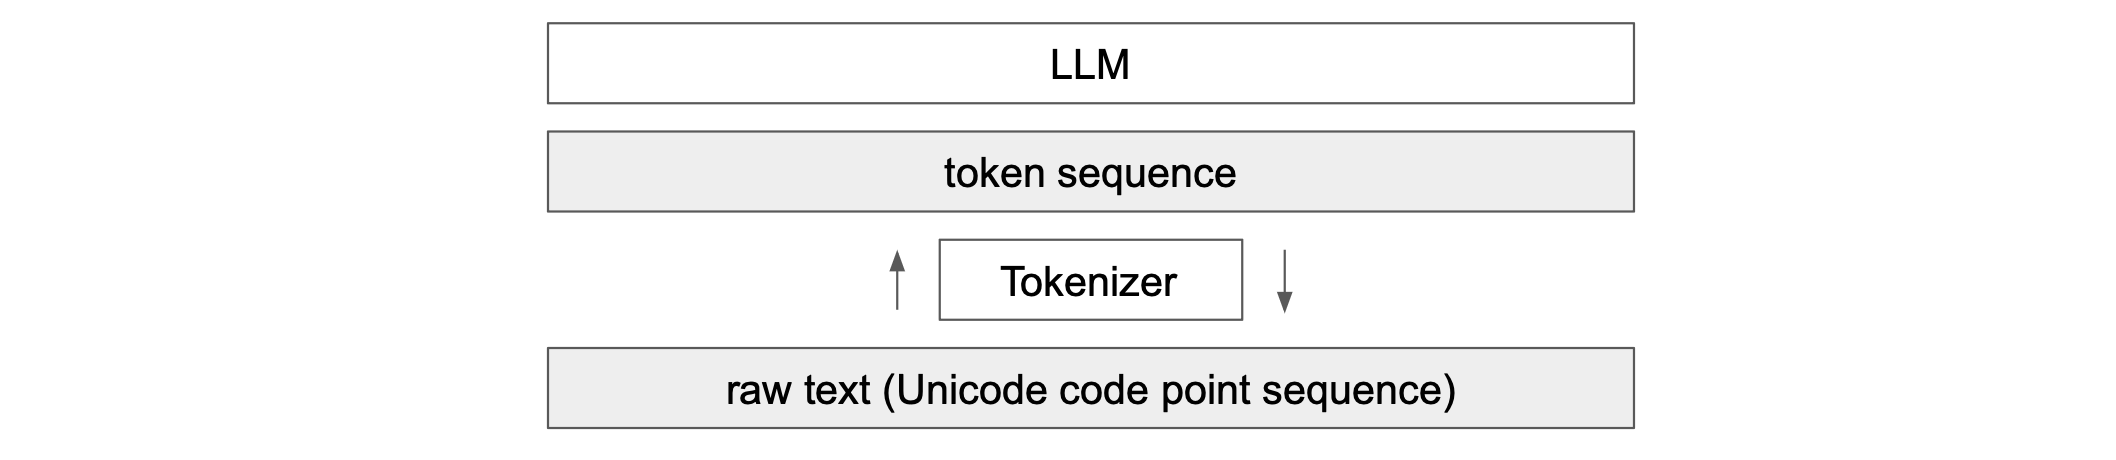

In [12]:
Image("tokenizer.png")

### decoding

In [13]:
# vocab : {0: b'\x00', 1: b'\x01', ..., 65: b'A', ..., 255: b'\xff'}
vocab = {idx: bytes([idx]) for idx in range(256)}

# vocab dict를 확장한다.
# 확장 내용은, merges에 기록해둔, 256부터의 병합 규칙을 추가하는 것이다.
# ex : (101, 32) , 256라는 규칙을,
#       vocab[256] = vocab[101] + vocab[32]
#       와 같이, vocab의 key와 value에 새롭게 추가
for (p0, p1), idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1]

def decode(ids):
    # given ids (list of integers), return Python string
    tokens = b"".join(vocab[idx] for idx in ids)
    text = tokens.decode('utf-8', errors='replace') # errors가 나타났을 때 'replace'는 대체 문자 처리
    return text

print(decode([128]))

�


### encoding

In [15]:
def encode(text):
  # given a string, return list of integers (the tokens)
  tokens = list(text.encode("utf-8"))
  while len(tokens) >= 2:
    stats = get_stats(tokens)
    # pair : merges[p]를 기준으로 stats의 최솟값을 구하고  pair에 저장한다.
    # 여기서 인자로 전달되는 p는 (44,32)와 같은 key값이다.
    pair = min(stats, key=lambda p: merges.get(p, float("inf")))
    if pair not in merges:
      break # nothing else can be merged
    idx = merges[pair]
    tokens = merge(tokens, pair, idx)
  return tokens

print(encode("hello world!"))

[104, 101, 108, 108, 111, 32, 119, 266, 100, 108, 33]


In [16]:
print(decode(encode("hello world")))

hello world


In [17]:
text2 = decode(encode(text))
print(text2 == text)

True


In [18]:
valtext = "Many common characters, including numerals, punctuation, and other symbols, are unified within the standard and are not treated as specific to any given writing system. Unicode encodes thousands of emoji, with the continued development thereof conducted by the Consortium as a part of the standard.[4] Moreover, the widespread adoption of Unicode was in large part responsible for the initial popularization of emoji outside of Japan. Unicode is ultimately capable of encoding more than 1.1 million characters."
valtext2 = decode(encode(valtext))
print(valtext2 == valtext)

True


 ### Forced splits using regex patterns (GPT series)